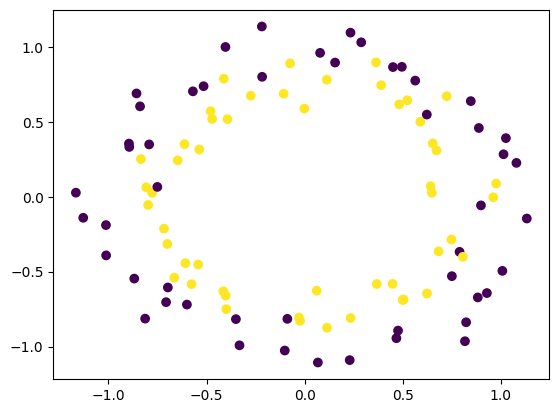

In [47]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

X, y = make_circles(n_samples=100, noise=0.1)

data = np.hstack((X, y.reshape(-1,1)))
df = pd.DataFrame(data)

fig, ax = plt.subplots()
ax.scatter(x=X[:,0], y=X[:,1],c=y)